# Pertemuan 7 - Tugas

Nama    : Muhammad Rayhan
NIM     : 2241720213
Kelas   : TI-3H

In [1]:
import pandas as pd


In [2]:
# Load the dataset
file_path = "data/Mall_Customers.csv"
data = pd.read_csv(file_path)

In [3]:
# Check the first few rows and the general information of the dataset
data_head = data.head()
data_info = data.info()
data_description = data.describe()

data_head, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000     

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# Extract the relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

c:\Users\exern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\exern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\exern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\exern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

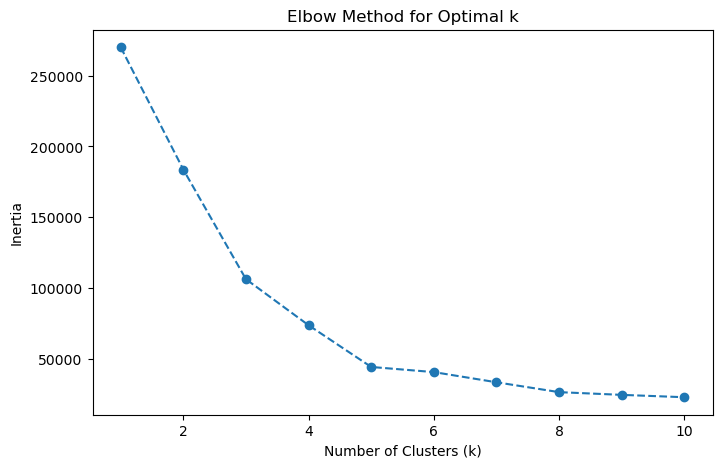

In [7]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
# Train K-Means with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

c:\Users\exern\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


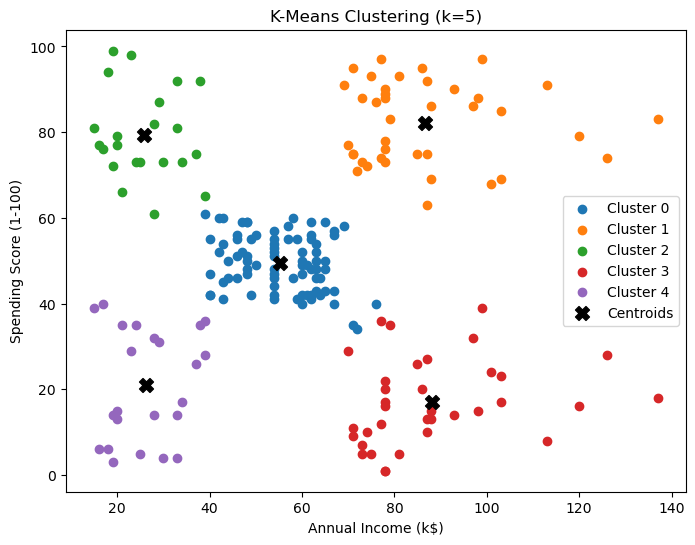

In [9]:
# Visualize the clustering result
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(X[data['Cluster'] == cluster]['Annual Income (k$)'],
                X[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering (k=5)')
plt.legend()
plt.show()